In [1]:
import os
import sys
from collections import namedtuple

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from colormaps import viridis  # DOWN WITH JET!

# Add my Python utils to the path
sys.path.append(os.path.join('..', 'Sean', 'py_utils'))

from pgm import read_pgm
from raw import read_raw

# Neural Network Image Processing for the JPL Space Design Competition

## or: How I Learned to Stop Worrying and Love the Net

---

In [2]:
# Define the locations of things
train_dir = os.path.join("..", "training data", "terrainS{slope}C{crater}R{rough}_100")
pgm_file = os.path.join(train_dir, "terrainS{slope}C{crater}R{rough}_100.pgm")
raw_file = os.path.join(train_dir, "terrainS{slope}C{crater}R{rough}_100_500by500_dem.raw")

difficulty = namedtuple("Difficulty", ["slope", "crater", "roughness"])
diffs = list(map(lambda x: difficulty(*x), [(0, 0, 10), (4, 0, 10), (4, 4, 10), (4, 4, 20)]))

# Problem

**Can we use neural networks to identify "safe" landing sites on a planetary surface?**

# Provided Information

* 4 Training sets of varying difficulty

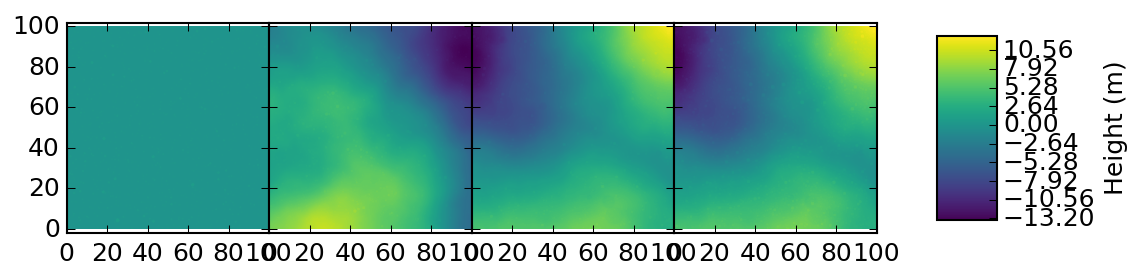

In [3]:
vmax = max(np.max(read_raw(raw_file.format(slope=d.slope, crater=d.crater, rough=d.roughness), 500, 500)) for d in diffs)
vmin = min(np.min(read_raw(raw_file.format(slope=d.slope, crater=d.crater, rough=d.roughness), 500, 500)) for d in diffs)

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_size_inches(8, 1.75)

x = np.linspace(0, 100, 500)
X, Y = np.meshgrid(x, x)

for i, d in enumerate(diffs):
    # Here's the data we'll plot
    raw = read_raw(raw_file.format(slope=d.slope, crater=d.crater, rough=d.roughness), 500, 500)
    
    ax = axs.flatten()[i]
    
    cf = ax.contourf(X, Y, raw, 500, cmap=viridis, vmax=vmax, vmin=vmin)
    
    ax.set_aspect('equal')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

fig.subplots_adjust(hspace=0, wspace=0, right=0.8)
cb_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(cf, cax=cb_ax)
cb.set_label('Height (m)')

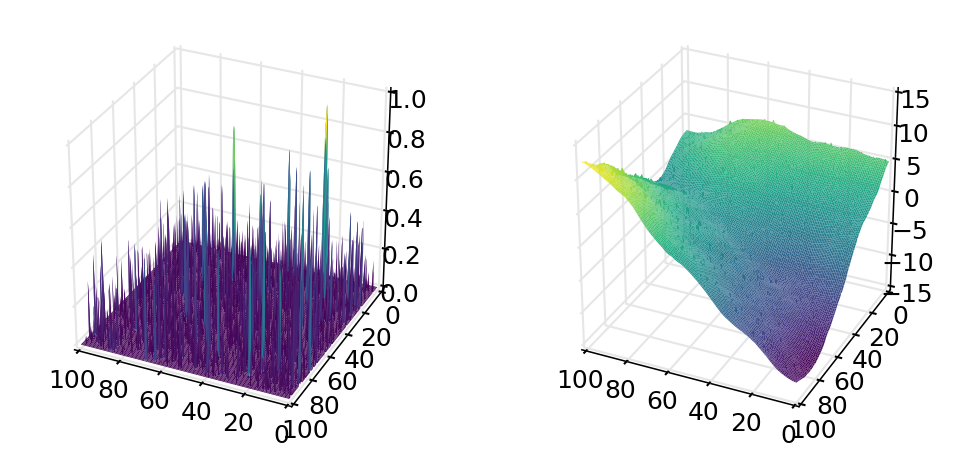

In [6]:
fig = plt.figure()
fig.set_size_inches(8, 3.5)

x = np.linspace(0, 100, 500)
X, Y = np.meshgrid(x, x)

# We'll just plot the easiest and hardest in 3d
for i, d in enumerate([diffs[0], diffs[-1]]):
    # Here's the data we'll plot
    raw = read_raw(raw_file.format(slope=d.slope, crater=d.crater, rough=d.roughness), 500, 500)

    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    ax.plot_surface(X, Y, raw, rstride=4, cstride=4, cmap=viridis, lw=0) #, vmax=vmax, vmin=vmin)
    
    ax.w_xaxis.pane.set_visible(False)
    ax.w_yaxis.pane.set_visible(False)
    ax.w_zaxis.pane.set_visible(False)
    
    ax.view_init(azim=115)